__Visualizing the SimMod output and comparing to RCP data.__

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 15
import pandas as pd

In [9]:
RCP_PATH = "../data/raw/RCP/"

rcp_emissions = dict()
rcp_concentrations = dict()
rcp_forcings = dict()

rcps = ['2.6', '4.5', '6.0', '8.5']
for rcp in rcps:
    if rcp == '2.6':
        name = '3PD'
    elif rcp == '4.5':
        name = '45'
    elif rcp == '6.0':
        name = '6'
    elif rcp == '8.5':
        name = '85'

    rcp_emissions[rcp] = pd.read_table(RCP_PATH+"RCP"+name+"_EMISSIONS.DAT",
                                       skiprows=37, sep='\s+')
    rcp_concentrations[rcp] = pd.read_table(RCP_PATH+"RCP"+name+"_MIDYEAR_CONCENTRATIONS.DAT",
                                            skiprows=38, sep='\s+')
    rcp_forcings[rcp] = pd.read_table(RCP_PATH+"RCP"+name+"_MIDYEAR_RADFORCING.DAT",
                                      skiprows=59, sep='\s+')

In [19]:
SIMMOD_PATH = "../../SimMod/results/"

# normalize_2000_conc=True, original input
#SIMMOD_TAG_85 = "200813-171618-pulse_response-rcp85"
#SIMMOD_TAG_60 = "200821-165141-pulse_response-rcp60"
#SIMMOD_TAG_45 = "200821-165210-pulse_response-rcp45"
#SIMMOD_TAG_26 = "200821-165221-pulse_response-rcp26"

# normalize_2000_conc=False, original input
#SIMMOD_TAG_85 = "200824-134248-pulse_response-rcp85"
#SIMMOD_TAG_60 = "200824-134239-pulse_response-rcp60"
#SIMMOD_TAG_45 = "200824-134228-pulse_response-rcp45"
#SIMMOD_TAG_26 = "200824-134220-pulse_response-rcp26"

# normalize_2000_conc=False, updated input
SIMMOD_TAG_85 = "200825-120415-pulse_response-rcp85"
SIMMOD_TAG_60 = "200825-120404-pulse_response-rcp60"
SIMMOD_TAG_45 = "200825-120353-pulse_response-rcp45"
SIMMOD_TAG_26 = "200825-120342-pulse_response-rcp26"

# normalize_2000_conc=True, updated input
#SIMMOD_TAG_85 = "200825-121823-pulse_response-rcp85"
#SIMMOD_TAG_60 = "200825-121812-pulse_response-rcp60"
#SIMMOD_TAG_45 = "200825-121800-pulse_response-rcp45"
#SIMMOD_TAG_26 = "200825-121749-pulse_response-rcp26"

# Read SimMod data
simmod85 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_85+"/results.csv")
simmod60 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_60+"/results.csv")
simmod45 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_45+"/results.csv")
simmod26 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_26+"/results.csv")

# Normalize temperature anomalies to (1961, 2000)
simmod85['t_s'] = simmod85['t_s']-simmod85[(simmod85['year']>1960) & (simmod85['year']<1991)]['t_s'].mean()
simmod60['t_s'] = simmod60['t_s']-simmod60[(simmod60['year']>1960) & (simmod60['year']<1991)]['t_s'].mean()
simmod45['t_s'] = simmod45['t_s']-simmod45[(simmod45['year']>1960) & (simmod45['year']<1991)]['t_s'].mean()
simmod26['t_s'] = simmod26['t_s']-simmod26[(simmod26['year']>1960) & (simmod26['year']<1991)]['t_s'].mean()

simmod = {'2.6': simmod26,
          '4.5': simmod45,
          '6.0': simmod60,
          '8.5': simmod85}

In [20]:
plot_kwargs = dict(lw=2.5)
colors = ['r', 'g', 'b', 'k']

In [21]:
for c in simmod85.columns:
    print(c)
#rcp_forcings['4.5']
rcp_emissions['4.5']

Unnamed: 0
date
year
co2_pg
ch4_tg
n2o_tg
co2_forcing_rcp
ch4_forcing_rcp
n2o_forcing_rcp
total_forcing_rcp
rcp_co2_ppm
rcp_ch4_ppb
rcp_n2o_ppb
co2_pg_atm
ch4_tg_atm
n2o_tg_atm
ch4_co2_decay_marginal
co2_ppm
ch4_ppb
n2o_ppb
co2_forcing
ch4_forcing
n2o_forcing
total_forcing_ghg
rcp_nonghg_forcing
total_forcing
t_os
t_eq
t_s


,YEARS,FossilCO2,OtherCO2,CH4,N2O,SOx,CO,NMVOC,NOx,BC,...,MCF,HCFC_22,HCFC_141B,HCFC_142B,HALON1211,HALON1202,HALON1301,HALON2402,CH3BR,CH3CL
0,1765,0.00300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,157.267,3100.211
1,1766,0.00300,0.005338,1.963262,0.005191,0.098883,9.050221,1.596875,0.109502,0.106998,...,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,157.267,3100.211
2,1767,0.00300,0.010677,2.436448,0.010117,0.116306,12.960844,2.292316,0.168038,0.133383,...,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,157.267,3100.211
3,1768,0.00300,0.016015,2.911105,0.015043,0.133811,16.876539,2.988648,0.226625,0.159847,...,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,157.267,3100.211
4,1769,0.00300,0.021353,3.387278,0.019969,0.151398,20.797465,3.685897,0.285264,0.186393,...,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,157.267,3100.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2496,0.66550,0.000000,268.969830,7.008500,11.253900,477.299600,140.033800,18.055900,3.862100,...,0.0,0.059,0.309,0.041,0.004,0.0,0.181,0.0,158.747,3511.082
732,2497,0.66775,0.000000,268.950800,7.008500,11.253900,477.299600,140.033800,18.055900,3.862100,...,0.0,0.059,0.309,0.041,0.004,0.0,0.181,0.0,158.752,3511.082
733,2498,0.67000,0.000000,268.931760,7.008500,11.253900,477.299600,140.033800,18.055900,3.862100,...,0.0,0.059,0.309,0.041,0.004,0.0,0.181,0.0,158.756,3511.082
734,2499,0.67225,0.000000,268.912730,7.008500,11.253900,477.299600,140.033800,18.055900,3.862100,...,0.0,0.059,0.309,0.041,0.004,0.0,0.181,0.0,158.761,3511.082


# Emissions
---

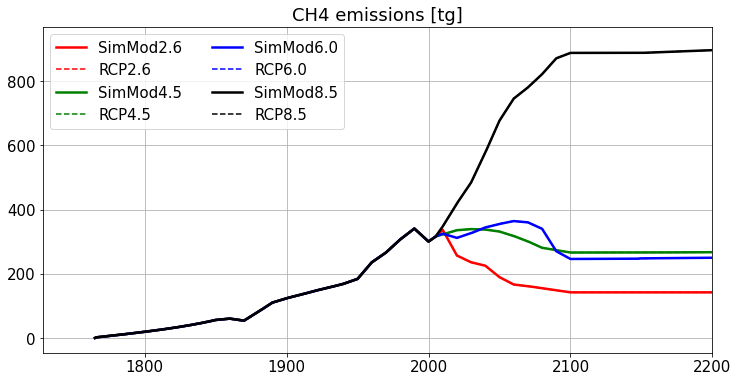

In [22]:
# CH4 emissions
fig, ax = plt.subplots(figsize=(12,6))
for rcp, c in zip(rcps, colors):
    data_simmod = simmod[rcp]
    data_rcp = rcp_emissions[rcp]
    
    ax.plot(data_simmod['year'], data_simmod['ch4_tg'], c=c, label=f"SimMod{rcp}", lw=2.5)
    ax.plot(data_rcp['YEARS'], data_rcp['CH4'], label=f"RCP{rcp}", c=c, ls='dashed')

plt.xlim(None, 2200)
plt.title("CH4 emissions [tg]")
plt.grid()
plt.legend(ncol=2)
plt.show()

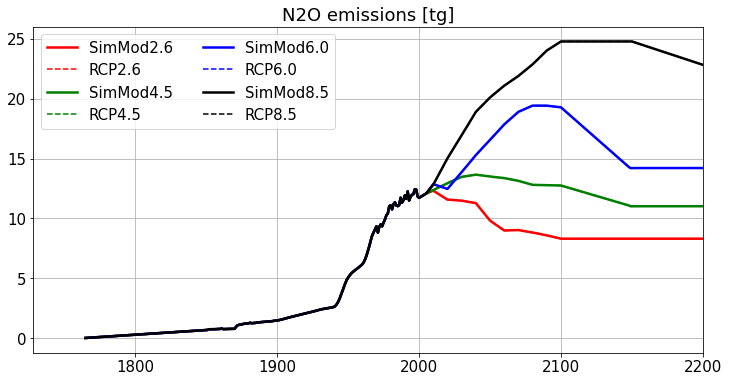

In [23]:
# N2O emissions
N_TO_N2O = (14.007*2+15.999)/(2*14.007)
N_TO_N2O

fig, ax = plt.subplots(figsize=(12,6))
for rcp, c in zip(rcps, colors):
    data_simmod = simmod[rcp]
    data_rcp = rcp_emissions[rcp]
    
    ax.plot(data_simmod['year'], data_simmod['n2o_tg'], c=c, label=f"SimMod{rcp}", lw=2.5)
    ax.plot(data_rcp['YEARS'], data_rcp['N2O']*N_TO_N2O, label=f"RCP{rcp}", c=c, ls='dashed')

plt.xlim(None, 2200)
plt.title("N2O emissions [tg]")
plt.grid()
plt.legend(ncol=2)
plt.show()

# Concentrations
---

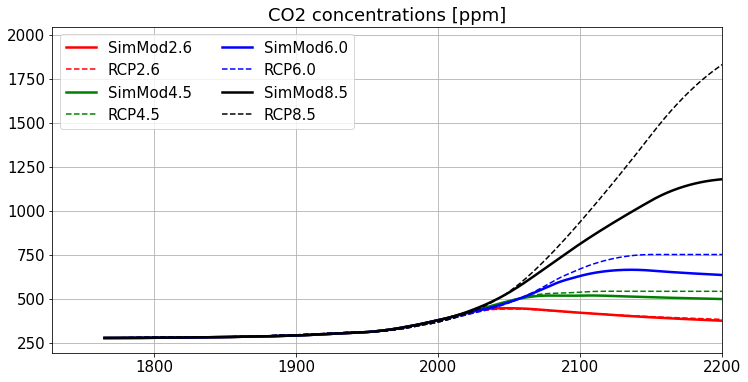

In [24]:
# CO2 concentrations 'co2_ppm'
fig, ax = plt.subplots(figsize=(12,6))
for rcp, c in zip(rcps, colors):
    data_simmod = simmod[rcp]
    data_rcp = rcp_concentrations[rcp]
    
    ax.plot(data_simmod['year'], data_simmod['co2_ppm'], c=c, label=f"SimMod{rcp}", lw=2.5)
    ax.plot(data_rcp['YEARS'], data_rcp['CO2'], label=f"RCP{rcp}", c=c, ls='dashed')

plt.xlim(None, 2200)
plt.title("CO2 concentrations [ppm]")
plt.grid()
plt.legend(ncol=2)
plt.show()

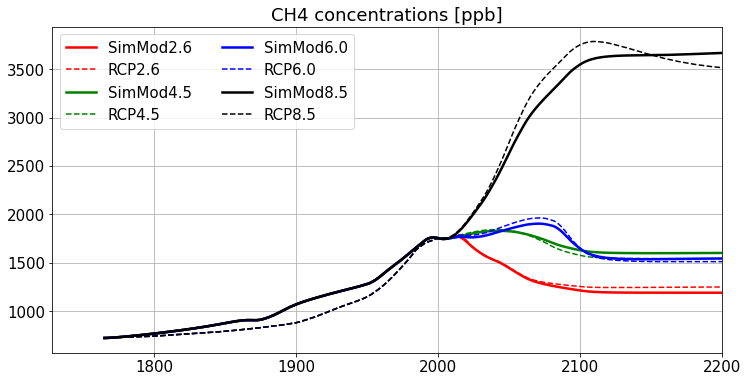

In [25]:
# CH4 concentrations
fig, ax = plt.subplots(figsize=(12,6))
for rcp, c in zip(rcps, colors):
    data_simmod = simmod[rcp]
    data_rcp = rcp_concentrations[rcp]
    
    ax.plot(data_simmod['year'], data_simmod['ch4_ppb'], c=c, label=f"SimMod{rcp}", lw=2.5)
    ax.plot(data_rcp['YEARS'], data_rcp['CH4'], label=f"RCP{rcp}", c=c, ls='dashed')

plt.xlim(None, 2200)
plt.title("CH4 concentrations [ppb]")
plt.grid()
plt.legend(ncol=2)
plt.show()

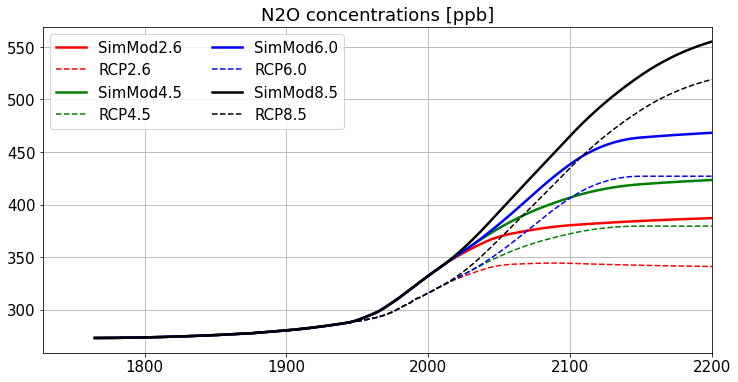

In [26]:
# N2O concentrations
fig, ax = plt.subplots(figsize=(12,6))
for rcp, c in zip(rcps, colors):
    data_simmod = simmod[rcp]
    data_rcp = rcp_concentrations[rcp]
    
    ax.plot(data_simmod['year'], data_simmod['n2o_ppb'], c=c, label=f"SimMod{rcp}", lw=2.5)
    ax.plot(data_rcp['YEARS'], data_rcp['N2O'], label=f"RCP{rcp}", c=c, ls='dashed')

plt.xlim(None, 2200)
plt.title("N2O concentrations [ppb]")
plt.grid()
plt.legend(ncol=2)
plt.show()

# Forcings
---

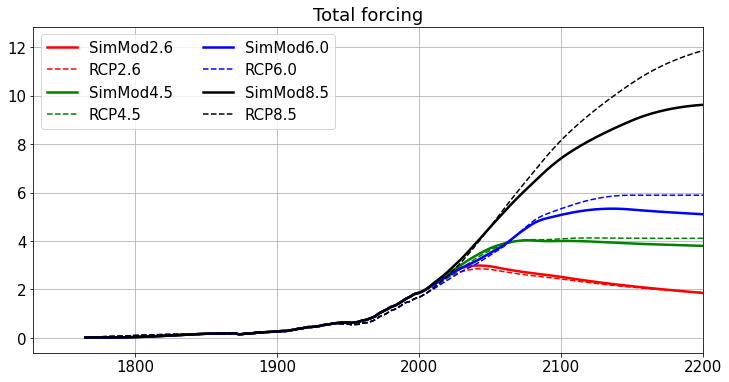

In [27]:
# Total forcing
fig, ax = plt.subplots(figsize=(12,6))
for rcp, c in zip(rcps, colors):
    data_simmod = simmod[rcp]
    data_rcp = rcp_forcings[rcp]
    
    ax.plot(data_simmod['year'], data_simmod['total_forcing'], c=c, label=f"SimMod{rcp}", lw=2.5)
    ax.plot(data_rcp['YEARS'], data_rcp['TOTAL_ANTHRO_RF'], label=f"RCP{rcp}", c=c, ls='dashed')

plt.xlim(None, 2200)
plt.title("Total forcing")
plt.grid()
plt.legend(ncol=2)
plt.show()

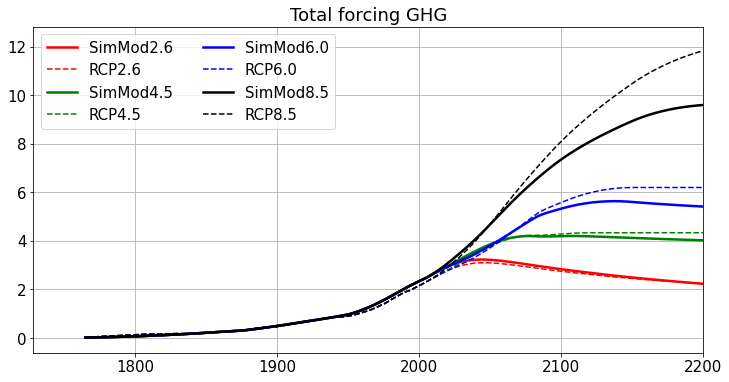

In [28]:
# Total forcing GHG (CO2, CH4, N2O)
fig, ax = plt.subplots(figsize=(12,6))
for rcp, c in zip(rcps, colors):
    data_simmod = simmod[rcp]
    data_rcp = rcp_forcings[rcp]
    
    ax.plot(data_simmod['year'], data_simmod['total_forcing_ghg'], c=c, label=f"SimMod{rcp}", lw=2.5)
    ax.plot(data_rcp['YEARS'], data_rcp['CO2CH4N2O_RF'], label=f"RCP{rcp}", c=c, ls='dashed')

plt.xlim(None, 2200)
#plt.xlim(2000,2100)
#plt.ylim(2,8)
plt.title("Total forcing GHG")
plt.grid()
plt.legend(ncol=2)
plt.show()

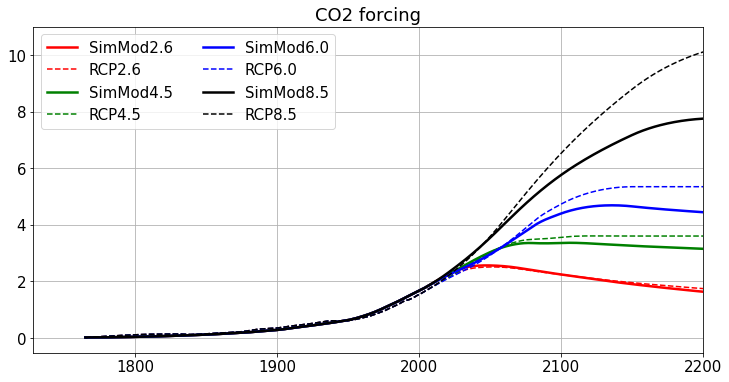

In [29]:
# CO2 forcing
fig, ax = plt.subplots(figsize=(12,6))
for rcp, c in zip(rcps, colors):
    data_simmod = simmod[rcp]
    data_rcp = rcp_forcings[rcp]
    
    ax.plot(data_simmod['year'], data_simmod['co2_forcing'], c=c, label=f"SimMod{rcp}", lw=2.5)
    ax.plot(data_rcp['YEARS'], data_rcp['CO2_RF'], label=f"RCP{rcp}", c=c, ls='dashed')

plt.xlim(None, 2200)
plt.title("CO2 forcing")
plt.grid()
plt.legend(ncol=2)
plt.show()

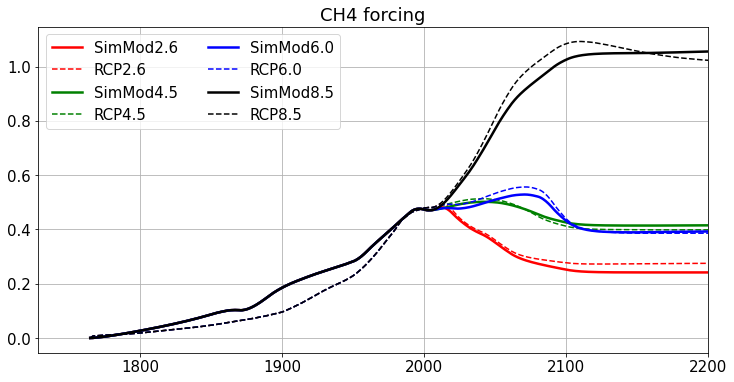

In [30]:
# CH4 forcing
fig, ax = plt.subplots(figsize=(12,6))
for rcp, c in zip(rcps, colors):
    data_simmod = simmod[rcp]
    data_rcp = rcp_forcings[rcp]
    
    ax.plot(data_simmod['year'], data_simmod['ch4_forcing'], c=c, label=f"SimMod{rcp}", lw=2.5)
    ax.plot(data_rcp['YEARS'], data_rcp['CH4_RF'], label=f"RCP{rcp}", c=c, ls='dashed')

plt.xlim(None, 2200)
plt.title("CH4 forcing")
plt.grid()
plt.legend(ncol=2)
plt.show()

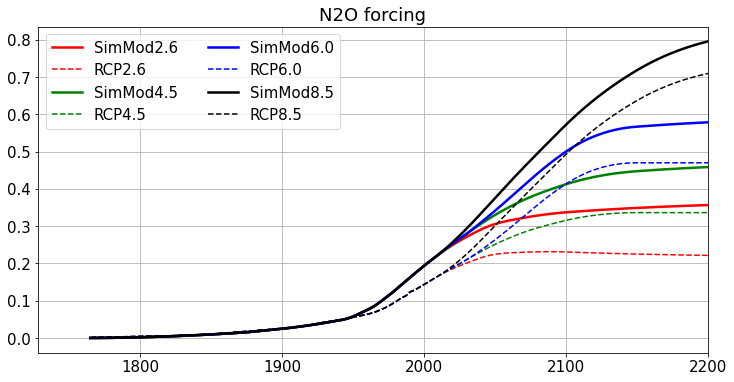

In [31]:
# N2O forcing
fig, ax = plt.subplots(figsize=(12,6))
for rcp, c in zip(rcps, colors):
    data_simmod = simmod[rcp]
    data_rcp = rcp_forcings[rcp]
    
    ax.plot(data_simmod['year'], data_simmod['n2o_forcing'], c=c, label=f"SimMod{rcp}", lw=2.5)
    ax.plot(data_rcp['YEARS'], data_rcp['N2O_RF'], label=f"RCP{rcp}", c=c, ls='dashed')

plt.xlim(None, 2200)
plt.title("N2O forcing")
plt.grid()
plt.legend(ncol=2)
plt.show()